# Notebook to run ExtractData.py

In [1]:
#execfile('/Users/kartiks/Documents/github/GolfScores/ExtractData.py')
#execfile('C:\docs\github\golfscores\ExtractData.py')
import matplotlib.pyplot as plt
import matplotlib
import itertools 
import numpy as np
matplotlib.style.use('ggplot')
%matplotlib inline

/Users/kartiks/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%run ExtractData.py

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
combined_df.describe()

,ATTACK ANG.,BALL SPEED,CARRY,CLUB PATH,CLUB SPEED,DYN. LOFT,FACE ANG.,FACE TO PATH,HEIGHT,LAND. ANG.,LAUNCH ANG.,SMASH FAC.,SPIN AXIS,SPIN LOFT,SPIN RATE,STROKE NO,SWING DIR.,SWING PL.,TOTAL
count,978.000000,1455.000000,1455.000000,933.000000,1455.000000,933.000000,933.000000,902.000000,1402.00000,1402.000000,1402.000000,1402.000000,437.000000,31.000000,1455.000000,1445.000000,1343.000000,1236.000000,1402.000000
mean,0.433231,90.306048,114.385498,0.026367,72.944742,26.254341,0.724973,0.884146,53.38766,36.869971,19.598288,1.231919,1.038215,24.748387,5714.737457,31.173702,0.890767,58.606149,127.671826
std,2.372249,11.277295,24.446840,2.941619,5.165230,5.435647,6.720754,6.747652,20.37641,9.508034,4.697473,0.135742,8.377021,6.890615,1627.935663,20.532715,3.788488,4.343975,23.540611
min,-6.600000,5.600000,6.200000,-9.900000,1.400000,3.600000,-25.600000,-19.100000,0.60000,1.900000,1.500000,0.090000,-26.800000,6.000000,650.000000,1.000000,-10.200000,2.400000,10.000000
25%,-1.000000,85.400000,104.950000,-1.800000,71.500000,23.500000,-3.400000,-3.475000,41.20000,32.900000,17.525000,1.180000,-4.100000,22.250000,4800.000000,14.000000,-1.600000,56.475000,116.825000
50%,0.300000,91.300000,117.700000,0.000000,73.200000,26.800000,0.700000,0.900000,56.05000,39.250000,20.200000,1.260000,1.600000,25.200000,5770.000000,29.000000,0.700000,58.800000,128.500000
75%,1.800000,96.650000,128.700000,1.900000,74.900000,29.800000,4.700000,5.375000,68.50000,43.500000,22.600000,1.310000,6.200000,27.800000,6800.000000,45.000000,3.200000,61.000000,139.700000
max,9.000000,128.700000,195.600000,10.600000,86.100000,38.400000,40.300000,38.600000,107.80000,53.200000,42.200000,1.500000,42.500000,37.300000,9830.000000,90.000000,16.600000,69.800000,228.000000


In [5]:
combined_df.columns.values

array([u'ATTACK ANG.', u'BALL SPEED', u'CARRY', u'CLUB', u'CLUB PATH',
       u'CLUB SPEED', u'DATE', u'DYN. LOFT', u'FACE ANG.', u'FACE TO PATH',
       u'HEIGHT', u'LAND. ANG.', u'LAUNCH ANG.', u'LOW POINT', 'SHEETNAME',
       u'SIDE', u'SIDE TOT.', u'SMASH FAC.', u'SPIN AXIS', u'SPIN LOFT',
       u'SPIN RATE', u'STROKE NO', u'SWING DIR.', u'SWING PL.', u'TOTAL'], dtype=object)

In [6]:
combined_df.SHEETNAME.unique()

array(['3-6-2015', '3-7 - 4-4', '4-8', '4-11-2015', '4-18-2015',
       '4-24-2015', '4-25-2015', '4-29-15', '5-16', '5-30-2015',
       '06-13-2015', '07-18-2015', '08-18-2015', '10-10-2015',
       '10-24-2015', '11-17-2015', '11-21-2015', '2-27-2016', '3-29-2016',
       '4-23-2016', '5-07-2016', '5-21-2016'], dtype=object)

In [7]:
combined_df.dtypes


ATTACK ANG.            float64
BALL SPEED             float64
CARRY                  float64
CLUB                    object
CLUB PATH              float64
CLUB SPEED             float64
DATE            datetime64[ns]
DYN. LOFT              float64
FACE ANG.              float64
FACE TO PATH           float64
HEIGHT                 float64
LAND. ANG.             float64
LAUNCH ANG.            float64
LOW POINT               object
SHEETNAME               object
SIDE                    object
SIDE TOT.               object
SMASH FAC.             float64
SPIN AXIS              float64
SPIN LOFT              float64
SPIN RATE              float64
STROKE NO              float64
SWING DIR.             float64
SWING PL.              float64
TOTAL                  float64
dtype: object

In [ ]:
combined_df.CLUB.unique()

### remove the  date '2015-04-25' since it has many NAN

In [8]:
combined_df = combined_df [combined_df['DATE']!='2015-04-24']

### Filter out the different Clubs and add them to store

In [9]:
hdf = pd.HDFStore('Golf_data.h5')
df = combined_df[combined_df.CLUB == '6']
hdf.put('I6', df, format = 'table', data_colums=True)

df = combined_df[combined_df.CLUB == '3']
hdf.put('I3', df, format = 'table', data_colums=True)

df = combined_df[combined_df.CLUB == 'Dr']
hdf.put('Dr', df, format = 'table', data_colums=True)


In [10]:
hdf


<class 'pandas.io.pytables.HDFStore'>
File path: Golf_data.h5
/Dr            frame_table  (typ->appendable,nrows->41,ncols->25,indexers->[index])  
/I3            frame_table  (typ->appendable,nrows->7,ncols->25,indexers->[index])   
/I6            frame_table  (typ->appendable,nrows->1355,ncols->25,indexers->[index])

In [66]:
df = hdf['I6']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x123560b90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x124a8a310>], dtype=object)

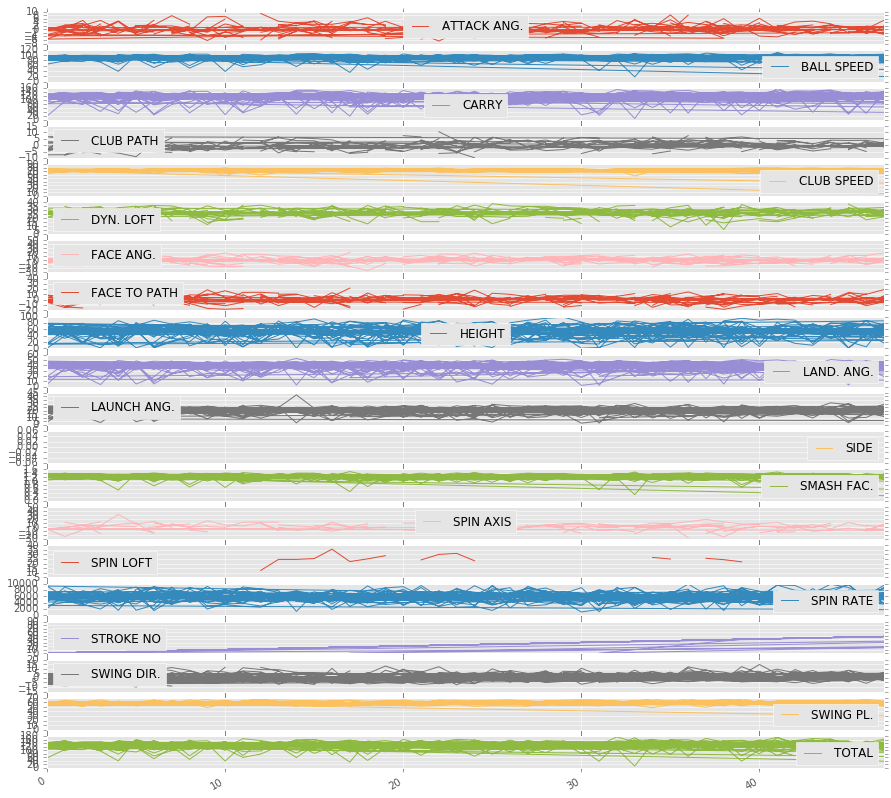

In [67]:
df.plot(subplots=True, figsize = (15,15))

In [68]:
df.describe()

,ATTACK ANG.,BALL SPEED,CARRY,CLUB PATH,CLUB SPEED,DYN. LOFT,FACE ANG.,FACE TO PATH,HEIGHT,LAND. ANG.,LAUNCH ANG.,SMASH FAC.,SPIN AXIS,SPIN LOFT,SPIN RATE,STROKE NO,SWING DIR.,SWING PL.,TOTAL
count,890.000000,1354.000000,1354.000000,890.000000,1354.000000,890.000000,890.000000,859.000000,1354.000000,1354.000000,1354.000000,1354.000000,410.000000,31.000000,1354.000000,1346.000000,1295.000000,1205.000000,1354.000000
mean,0.467079,89.491285,112.743205,-0.004607,72.759453,26.629213,0.676629,0.875902,53.205613,37.058493,19.735377,1.225923,0.884146,24.748387,5817.367061,32.124071,0.857143,58.745560,125.614549
std,2.369483,10.382532,22.957369,2.948545,4.723174,5.151542,6.802791,6.812004,20.135874,9.399494,4.652531,0.133294,8.201769,6.890615,1561.045271,20.616272,3.790653,4.270793,20.591343
min,-6.600000,7.300000,6.200000,-9.900000,1.800000,3.600000,-25.600000,-19.100000,0.600000,1.900000,1.500000,0.090000,-26.800000,6.000000,650.000000,1.000000,-10.200000,2.400000,10.000000
25%,-1.000000,85.200000,104.500000,-1.900000,71.400000,23.900000,-3.575000,-3.550000,41.225000,33.125000,17.700000,1.180000,-4.075000,22.250000,4900.000000,15.000000,-1.700000,56.700000,116.400000
50%,0.400000,90.800000,117.150000,0.000000,73.100000,27.000000,0.700000,0.900000,56.000000,39.400000,20.300000,1.250000,1.600000,25.200000,5850.000000,30.000000,0.600000,58.900000,127.900000
75%,1.800000,96.200000,127.900000,1.900000,74.800000,29.900000,4.775000,5.400000,68.100000,43.600000,22.675000,1.310000,5.975000,27.800000,6840.000000,46.000000,3.200000,61.000000,138.500000
max,9.000000,110.500000,159.200000,10.600000,81.700000,38.400000,40.300000,38.600000,98.500000,53.200000,42.200000,1.480000,42.500000,37.300000,9830.000000,90.000000,16.600000,69.800000,174.500000


### Analyze Key Columns : ATTACK ANG, BALL SPEED, SMASH FAC, FACE ANG, SWING DIR, TOTAL

In [75]:
group = ['DATE','STROKE NO', 'ATTACK ANG.', 'BALL SPEED', 'FACE ANG.', 'SMASH FAC.', 'SWING DIR.', 'TOTAL']
df = df[group]

In [76]:
df.describe()

,STROKE NO,ATTACK ANG.,BALL SPEED,FACE ANG.,SMASH FAC.,SWING DIR.,TOTAL
count,1346.000000,890.000000,1354.000000,890.000000,1354.000000,1295.000000,1354.000000
mean,32.124071,0.467079,89.491285,0.676629,1.225923,0.857143,125.614549
std,20.616272,2.369483,10.382532,6.802791,0.133294,3.790653,20.591343
min,1.000000,-6.600000,7.300000,-25.600000,0.090000,-10.200000,10.000000
25%,15.000000,-1.000000,85.200000,-3.575000,1.180000,-1.700000,116.400000
50%,30.000000,0.400000,90.800000,0.700000,1.250000,0.600000,127.900000
75%,46.000000,1.800000,96.200000,4.775000,1.310000,3.200000,138.500000
max,90.000000,9.000000,110.500000,40.300000,1.480000,16.600000,174.500000


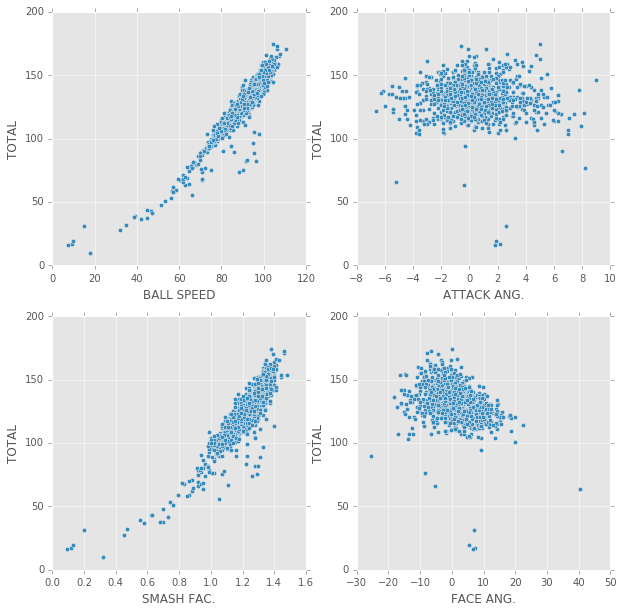

In [77]:
plotType = 'scatter'
fig, axes = plt.subplots(nrows = 2, ncols=2, figsize =(10,10))
df.plot(x='BALL SPEED', y='TOTAL', kind=plotType, ax=axes[0,0])
df.plot(x='ATTACK ANG.', y='TOTAL', kind=plotType, ax=axes[0,1] )
df.plot(x='SMASH FAC.', y='TOTAL', kind=plotType,ax=axes[1,0])
df.plot(x='FACE ANG.', y='TOTAL', kind=plotType, ax=axes[1,1])


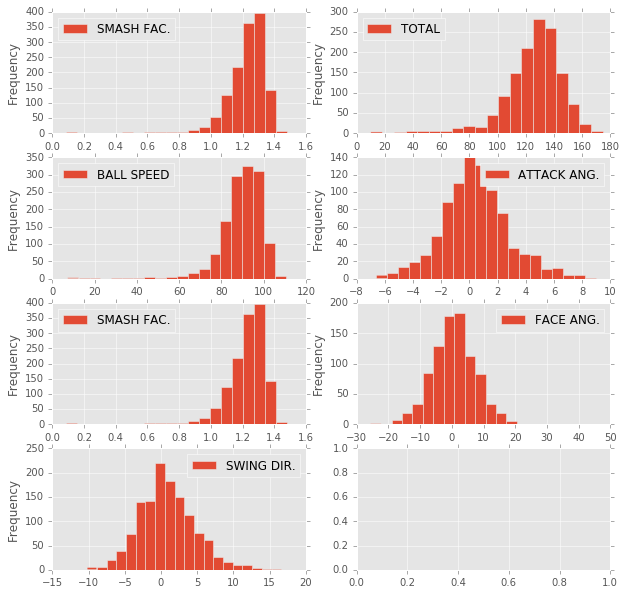

In [17]:
fig, axes = plt.subplots(nrows = 4, ncols=2, figsize =(10,10))
df['SMASH FAC.'].plot.hist(bins=20, ax=axes[0,0], legend=True)
df['TOTAL'].plot.hist(bins=20, ax=axes[0,1] , legend=True)
df['BALL SPEED'].plot.hist(bins=20, ax=axes[1,0], legend=True)
df['ATTACK ANG.'].plot.hist(bins=20, ax=axes[1,1], legend=True)
df['SMASH FAC.'].plot.hist(bins=20, ax=axes[2,0], legend=True)
df['FACE ANG.'].plot.hist(bins=20, ax=axes[2,1], legend=True)
df['SWING DIR.'].plot.hist(bins=20, ax=axes[3,0], legend=True)



In [78]:
df.drop('STROKE NO', 1).corr()

,ATTACK ANG.,BALL SPEED,FACE ANG.,SMASH FAC.,SWING DIR.,TOTAL
ATTACK ANG.,1.000000,-0.145091,-0.112447,-0.126916,0.520680,-0.043091
BALL SPEED,-0.145091,1.000000,-0.152845,0.950179,-0.244759,0.941017
FACE ANG.,-0.112447,-0.152845,1.000000,-0.164348,0.097198,-0.320602
SMASH FAC.,-0.126916,0.950179,-0.164348,1.000000,-0.262058,0.894573
SWING DIR.,0.520680,-0.244759,0.097198,-0.262058,1.000000,-0.209817
TOTAL,-0.043091,0.941017,-0.320602,0.894573,-0.209817,1.000000


### My average Swing Direction over time

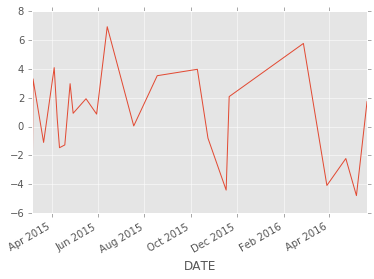

In [92]:
sd_df = df.groupby('DATE').mean()
sd_s = sd_df['FACE ANG.']
sd_s.plot()

### stats for the latest date

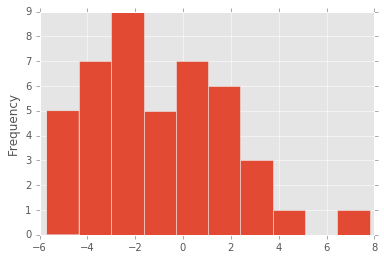

In [80]:
dfD = df.set_index('DATE')
tdf = df[df['DATE']== dfD.index.max()]
tdf =tdf['SWING DIR.']
tdf.plot.hist()

In [81]:
dfD.head()

,STROKE NO,ATTACK ANG.,BALL SPEED,FACE ANG.,SMASH FAC.,SWING DIR.,TOTAL
DATE,,,,,,,
2015-03-06,1.0,NaN,66.3,NaN,1.05,-0.4,55.6
2015-03-06,2.0,NaN,78.4,NaN,1.12,-3.1,103.6
2015-03-06,3.0,NaN,76.1,NaN,1.11,NaN,102.5
2015-03-06,4.0,2.1,92.5,-9.9,1.29,-1.8,130.6
2015-03-06,5.0,NaN,79.4,NaN,1.08,-2.3,105.0


In [ ]:
for gr in group:
    df[gr].plot.hist(bins=20)

In [ ]:
df.plot.hist?

In [ ]:
df['SWING DIR.'].plot()

In [ ]:
#df = df.reset_index()
grouped= df[['DATE', 'TOTAL']].groupby('DATE')
#df.head()

In [ ]:
for date, group in grouped:
    print date
    print group.TOTAL

In [ ]:
for date, group in grouped:
    plt.plot(group['TOTAL'], label=date)
plt.show()

In [ ]:
grouped.boxplot(subplots=True, figsize = (15,15))

In [ ]:
bydate = df.groupby('DATE')
#bydate = bydate.mean()
#bydate.drop(pd.Timestamp('20150424'))

TODO: Figure out how to plot the differnet measures, since "bydate" above already calculates mean. So need to determine how to drop a row index when you group by. Below will give an Error

In [ ]:

bydate.mean()
#bydate.min()['TOTAL'].plot()
#bydate.max()['TOTAL'].plot()

In [ ]:
#bydate['ATTACK ANG.'].plot()
#bydate['SWING DIR.'].plot()
bydate['TOTAL'].plot()